# Yandex.Afisha - Server logs analysis

For this project, we will analyze data from Yandex.Afisha's server logs, orders, and marketing expenses. 

Our objective is to study customer behavior, pinpoint when they begin to make purchases, and determine the amount
of revenue generated per customer.

Throughout this case study, we will focus on several key areas, such as:

- how customers interact with the product

- the timing of their purchases

- the revenue generated by each customer.

Our analysis will ultimately help Yandex.Afisha optimize their marketing expenses by identifying the point at which revenue generated surpasses marketing expenses.


## Table of Content

[**Step 1: Data Loading & Preprocessing**](#1)

[**Visits** Data-Set](#1)
* [Converting 'start_ts' & 'end_ts'](#2)
* [Missing Data & Duplicates](#3)

[**Orders** Data-Set](#4)
* [Converting 'buy_ts'](#5)
* [Missing Data & Duplicates](#6)

[**Marketing** Data-Set](#7)
* [Converting 'dt'](#8)
* [Missing Data & Duplicates](#9)

[**Step 2: Calculating Metrics**](#10)
* [Daily Active Users: DAU](#11)
* [Weekly Active Users: WAU](#12)
* [Monthly Active Users: MAU](#13)
* [Sessions Per Day](#14)
* [Total Session Per Day Vs. DAU](#15)
* [Session Length](#16)
* [Retention Rate](#17)
* [Overall Retention Rate](#18)
* [Conversion Rate](#19)
* [Average Purchase Size](#20)
* [Life Time Value: LTV](#21)
* [Marketing Costs](#22)
* [Costs Per Source](#23)
* [Costs Over Time By Source](#24)
* [Costs By Months](#25)
* [Customer Acquisition Cost: CAC](#26)
* [User's First Source](#27)
* [Costs By Months & Sources](#28)
* [Buyers Per Months & Sources](#29)
* [Overall CAC Per Source & Month](#30)
* [Return Of Investment - ROI By Cohorts](#31)
* [LTV Per Source](#32)
* [Return Of Marketing Investment: ROMI Per Source](#33)

[**Overall Conclusions**](#34)

### Step 1: Data Loading & Preprocessing

In [281]:
# importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

<a id="1"></a>

#### 'visits' Data:

In [282]:
# reading visits data; creating 'visits' variable

try:
    visits = pd.read_csv('/Users/ohayo/Desktop/Data/visits_log_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')

# checking visits info

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [283]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [284]:
# Checking time range correspondence with project description:

display(visits.start_ts.min())
display(visits.end_ts.max())

'2017-06-01 00:01:00'

'2018-06-01 01:26:00'

In [285]:
# Extracting some smaples:

display(visits.head(3))
display(visits.tail(2))
visits.sample(1)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527


,device,end_ts,source_id,start_ts,uid
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559


,device,end_ts,source_id,start_ts,uid
2111,desktop,2017-12-10 15:00:00,4,2017-12-10 14:33:00,10359614378001914789


<a id="2"></a>

#### Converting 'start_ts' & 'end_ts' to datetime objects:

In [286]:
# Converting 'start_ts' & 'end_ts' to datetime objects

visits['start_ts']=pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")

visits['end_ts']=pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")

# Creating 'date','week' & 'month' of visits columns

visits['date']=visits['start_ts'].astype('datetime64[D]')

visits['week']=visits['start_ts'].astype('datetime64[W]')

visits['month']=visits['start_ts'].astype('datetime64[M]')

<a id="3"></a>

#### Checking Missing Values & Duplicates:

In [287]:
# Cheking missing values:

visits.isnull().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
date         0
week         0
month        0
dtype: int64

In [288]:
# Checking Duplicates:

visits.duplicated().sum()

0

In [289]:
visits.describe(include="all")

,device,end_ts,source_id,start_ts,uid,date,week,month
count,359400,359400,359400.000000,359400,3.594000e+05,359400,359400,359400
unique,2,224760,NaN,224303,NaN,364,53,12
top,desktop,2017-11-24 16:51:00,NaN,2017-11-24 16:06:00,NaN,2017-11-24 00:00:00,2017-11-23 00:00:00,2017-11-01 00:00:00
freq,262567,23,NaN,19,NaN,4042,14186,43969
first,NaN,2017-06-01 00:02:00,NaN,2017-06-01 00:01:00,NaN,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00
last,NaN,2018-06-01 01:26:00,NaN,2018-05-31 23:59:00,NaN,2018-05-31 00:00:00,2018-05-31 00:00:00,2018-05-01 00:00:00
mean,NaN,NaN,3.750515,NaN,9.202557e+18,NaN,NaN,NaN
std,NaN,NaN,1.917116,NaN,5.298433e+18,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,1.186350e+13,NaN,NaN,NaN
25%,NaN,NaN,3.000000,NaN,4.613407e+18,NaN,NaN,NaN


<div class="alert alert-info"> 
<b>Comment</b>
    
We used str.lower() & str.replace to lower case columns names & replacing spaces by an under-lines.
    
We converted the 'start ts' & 'end ts' columns to a datetime object.
    
wev'e added 3 additional columns: 'date','week' & 'month'.
    
We have no missing values and no duplicate rows.
</div>

#### 'orders' data:

<a id="4"></a>

In [290]:
try:
    orders = pd.read_csv('/Users/ohayo/Desktop/Data/orders_log_us.csv')
    print('Working Locally')
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    print('School\'s Platform')

Working Locally


In [291]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [292]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [293]:
# Checking time range correspondence with project description:

display(orders.buy_ts.min())
display(orders.buy_ts.max())

'2017-06-01 00:10:00'

'2018-06-01 00:02:00'

In [294]:
# Extracting some smaples:

display(orders.head(3))
display(orders.tail(2))
orders.sample(1)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844


,buy_ts,revenue,uid
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


,buy_ts,revenue,uid
25652,2017-12-23 23:03:00,1.63,6590401805405240493


#### Converting 'buy_ts' to datetime object:

<a id="5"></a>

In [295]:
# Converting 'buy_ts' to a datetime object:

orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")

# Creating 'date','week' & 'month' of orders columns:

orders['date']=orders['buy_ts'].astype('datetime64[D]')

orders['week']=orders['buy_ts'].astype('datetime64[W]')

orders['month']=orders['buy_ts'].astype('datetime64[M]')

#### Checking Missing Values & Duplicates:

<a id="6"><a>

In [296]:
orders.isnull().sum()

buy_ts     0
revenue    0
uid        0
date       0
week       0
month      0
dtype: int64

In [297]:
orders.duplicated().sum()

0

In [298]:
orders.describe(include='all')

,buy_ts,revenue,uid,date,week,month
count,50415,50415.000000,5.041500e+04,50415,50415,50415
unique,45991,NaN,NaN,364,53,13
top,2018-05-31 10:13:00,NaN,NaN,2017-11-24 00:00:00,2017-11-23 00:00:00,2017-12-01 00:00:00
freq,9,NaN,NaN,814,2120,6218
first,2017-06-01 00:10:00,NaN,NaN,2017-06-01 00:00:00,2017-06-01 00:00:00,2017-06-01 00:00:00
last,2018-06-01 00:02:00,NaN,NaN,2018-06-01 00:00:00,2018-05-31 00:00:00,2018-06-01 00:00:00
mean,NaN,4.999647,9.098161e+18,NaN,NaN,NaN
std,NaN,21.818359,5.285742e+18,NaN,NaN,NaN
min,NaN,0.000000,3.135781e+14,NaN,NaN,NaN
25%,NaN,1.220000,4.533567e+18,NaN,NaN,NaN


<div class="alert alert-info"> 
<b>Comment</b> 

We used str.lower() & str.replace to lower case columns names & replacing spaces by an under-lines.
    
We converted the 'buy_ts' to a datetime object.
    
wev'e added 3 additional columns: 'date','week' & 'month'.
    
We have no missing values and no duplicate rows.
</div>

#### Marketing Data-Set:

<a id="7"></a>

In [299]:
# reading costs (marketing) data

try:
    costs = pd.read_csv('/Users/ohayo/Desktop/Data/costs_us.csv')
    print("Working Locally")
except:
    costs = pd.read_csv('/datasets/costs_us.csv', sep='\t')
    print("School\'s Platform'")

Working Locally


In [300]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [301]:
display(costs.head(3))
display(costs.tail(2))
costs.sample(1)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53


,source_id,dt,costs
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


,source_id,dt,costs
484,2,2017-09-30,120.1


In [302]:
# Checking time range correspondence with project description:

display(costs.dt.min())
display(costs.dt.max())

'2017-06-01'

'2018-05-31'

#### Converting  'dt' to a datetime object:

<a id="8"></a>

In [303]:
costs['dt']=pd.to_datetime(costs['dt'], format="%Y-%m-%d")

# Creating 'cost_month' column

costs['cost_month']=costs['dt'].astype('datetime64[M]')

#### Cheking Missing Values & Duplicates:

<a id="9"></a>

In [304]:
costs.isnull().sum()

source_id     0
dt            0
costs         0
cost_month    0
dtype: int64

In [305]:
costs.duplicated().sum()

0

In [306]:
costs.describe(include="all")

,source_id,dt,costs,cost_month
count,2542.000000,2542,2542.000000,2542
unique,NaN,364,NaN,12
top,NaN,2017-06-01 00:00:00,NaN,2017-07-01 00:00:00
freq,NaN,7,NaN,217
first,NaN,2017-06-01 00:00:00,NaN,2017-06-01 00:00:00
last,NaN,2018-05-31 00:00:00,NaN,2018-05-01 00:00:00
mean,4.857199,NaN,129.477427,NaN
std,3.181581,NaN,156.296628,NaN
min,1.000000,NaN,0.540000,NaN
25%,2.000000,NaN,21.945000,NaN


<div class="alert alert-info"> 
<b>Intermediate Conclusions</b> 

1. The data time range corresponds with the research period.

2. There are no missing values nor duplicates.

3. Column names have been arranged so that they won't include a space. 
    in addition, the uppercase letters have been lowered.
</div>

### Step 2: Calculating Metrics

<a id="10"></a>

In [307]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,date,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01


#### Daily Active Users - DAU:

<a id="11"></a>

In [308]:
# Calculating DAU

dau=visits.groupby(visits['date'])['uid'].nunique().reset_index()
display(dau.head())

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [309]:
fig = px.line(dau, x=dau['date'], y=dau['uid'], title='DAU')

fig.add_hline(y=dau['uid'].mean(),line_dash='dash', line_color='purple',\
              annotation_text='average DAU', annotation_position='top left')
fig.show()
display('DAU Mean:', round(dau['uid'].mean(), 2))

'DAU Mean:'

907.99

<div class="alert alert-info"> 
<b>Insights</b> 

908 users are active each day on average.
    

In comparison to the overall DAU average, the DAU is lower from June to September 25th.
    
There may be a seasonal component to this low.

    
Summer months from June through September are when people may be more interested in spending time outdoors.

The DAU increases gradually but steadily from September 27th to Mars 28th, reaching a high peak in November 24th.

Thanksgiving as a global holiday celebrated on November 24.
    
Additionally, the International Debut and Student Film Festival NACHALO took place from November 20–24 in Saint Petersburg & Singles day at November 11.

During the period of March 28 to May 29, DAU declines.
    
The weather is warming up, making it more enjoyable to engage in outdoor activities like going to the beach and jogging,
    
therefore this decrease in DAU may be seasonal in nature.

It's probable that students and others enjoyed a number of performances, plays, and concerts over the festival time, 

which can account for the rise at DAU.
</div>

#### Weekly Active Users

<a id="12"></a>

In [310]:
visits.groupby('week').agg({'date' : 'nunique'}).query('date < 7')

,date
week,
2018-03-29,6
2018-05-31,1


In [311]:
# I'm excluding 2018 last week: 2018-05-31 , since it only contain one day;

wau=visits.query('week != "2018-05-31"').groupby(visits['week'])['uid'].\
nunique().reset_index()

display(wau.head(5))

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


In [312]:
round(wau['uid'].mean(), 2) # Calculating WAU mean

5796.1

In [313]:
fig = px.line(wau, x=wau['week'], y=wau['uid'], title='WAU')

fig.add_trace(go.Scatter(x=wau['week'], y=wau['uid'],\
                         mode='lines+markers', name='lines+markers', line=dict(color='purple', width=5)))

fig.add_hline(y=wau['uid'].mean(), line_dash='dash',\
              line_color='red', annotation_text='average WAU', annotation_position='top left')

fig.show()

display('WAU Mean:', round(wau['uid'].mean(), 0))

'WAU Mean:'

5796.0

<div class="alert alert-info"> 
<b>Insights</b> 

5724.5 users are active each week on average.

The weekly active users (WAU) index is lower than the yearly average from June 1 to September 21.
The overall pattern is remarkably similar to the DAU curve, and it appears that seasonality is at play here as seen by the fact that demand for tickets is low during certain months.

The index rises from September 21 to April 5, with four distinct peaks.
November 2017 appears to have been characterised as a shopping month.

The are 5 international holidays that were celebrated durinf this month:
    
5 November:  Daylight Saving (End)
Veterans Day on November 11
23 November:  Thanksgiving
24 November:  Black  Friday
27 November:  Cyber Monday

Starting in the week of May 5 through the end of the month, the index had droped below the yearly average.

It should be noted, that there were several protests against corruption against the Russian government from March 2017 to the end of 2018. It is not easy to attribute the rise in demand for shows and concerts to the demonstrations alone, but it is possible that civil unrest may encourage more opportunities for social connections and/or eskepisem relif of different types.
</div>

#### Monthly Active Users

<a id="13"></a>

In [314]:
mau=visits.groupby(visits['month'])['uid'].nunique().reset_index()

display(mau.head(5))

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


In [315]:
fig = px.line(mau, x='month', y='uid', title='MAU')
fig.add_hline(y=mau['uid'].mean(),line_dash='dash', line_color='black',\
              annotation_text='average MAU', annotation_position='top left')

fig.show()

display('MAU Mean:', round(mau['uid'].mean(), 2))

'MAU Mean:'

23228.42

<div class="alert alert-info"> 
<b>Insights</b> 

23,228.5 users are active each month on average.

The characteristics of the monthly picture of active users resemble the patterns seen in the weekly and daily pictures.

The monthly active user index is lower than the yearly average from early June to early September.
We observe a growth in the index from early September to the middle of March, with the month of November exhibiting the biggest peak of the number of monthly active users.

We observed that the index deviates from the yearly average from the middle of March to the first few days of May.
</div>

#### Sessions Per Day

<a id="14"></a>

In [316]:
dau_sess2 = visits.groupby('date').\
agg(unique_users = ('uid','nunique'), events_number = ('uid','count'))

dau_sess2

,unique_users,events_number
date,,
2017-06-01,605,664
2017-06-02,608,658
2017-06-03,445,477
2017-06-04,476,510
2017-06-05,820,893
...,...,...
2018-05-27,620,672
2018-05-28,1039,1156
2018-05-29,948,1035


In [317]:
dau_sess2 = dau_sess2.assign(event_per_user = lambda x: dau_sess2['events_number']\
                           / dau_sess2['unique_users']).reset_index()

In [318]:
fig=px.line(dau_sess2, x='date', y='event_per_user', title='Sessions Per User')

fig.show()

display(round(dau_sess2.mean(), 2))

unique_users      907.99
events_number     987.36
event_per_user      1.08
dtype: float64

<div class="alert alert-info"> 
<b>Insights</b> 

The average sessions in a day: 908 (rounded).

The average sessions per user: 1 and remains pretty much stable throughout the year.
</div>

In [319]:
dau.sample

<bound method NDFrame.sample of           date   uid
0   2017-06-01   605
1   2017-06-02   608
2   2017-06-03   445
3   2017-06-04   476
4   2017-06-05   820
..         ...   ...
359 2018-05-27   620
360 2018-05-28  1039
361 2018-05-29   948
362 2018-05-30  1289
363 2018-05-31  1997

[364 rows x 2 columns]>

#### Total Session Per Day Vs. DAU

<a id="15"></a>

In [320]:
# Comparing the dynamics of total sessions per day VS dau:

fig=go.Figure()

fig = px.line(dau, title='sessions per day VS dau', x=dau['date'], y=dau['uid'])

fig.add_trace(go.Scatter(x=dau['date'], y=dau['uid'], mode='lines',\
                         name='DAU', line=dict(color='yellow', width=2)))

fig.add_trace(go.Scatter(x=dau_sess2['date'], y=dau_sess2['unique_users'],\
                         name='sessions', line=dict(color='black', width=2)))

fig.update_layout(showlegend=True, plot_bgcolor='grey', margin=dict(t=10, l=10, b=10, r=10))
fig.show()

<div class="alert alert-info"> 
<b>Insights</b> 

By comparing total sessions per day to the dynamics of DAU, we see that there is no difference between them: 

An increase in the number of daily sessions associated with an increase in the number of daily active users.
</div>

#### Session Length

<a id="16"></a>

In [321]:
# Calculating the length of each session

visits['session_duration_sec']=(visits['end_ts'] - visits['start_ts']).dt.total_seconds()

print(visits['session_duration_sec'].median())

300.0


In [322]:
(visits['end_ts'] - visits['start_ts']).dt.total_seconds().describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
dtype: float64

__The Median time of a session is: 300 seconds/5 minutus__.

#### Retention Rate:

<a id="17"></a>

In [323]:
# Finding the first session for each user

first_session=visits.groupby(['uid'])['start_ts'].min().reset_index()

first_session.columns=['uid', 'first_session']

first_session.head(10)

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
5,397399764396656,2018-01-18 12:32:00
6,407573351275847,2017-06-17 13:40:00
7,498809019029702,2018-02-21 22:09:00
8,526778907996220,2017-10-21 17:51:00
9,577434573913691,2018-01-28 14:15:00


In [324]:
# Merg into visits table;

visits=visits.merge(first_session, how='inner', on=['uid'])

visits.head(10)

,device,end_ts,source_id,start_ts,uid,date,week,month,session_duration_sec,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440.0,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1680.0,2018-03-09 20:05:00
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0.0,2017-12-27 14:06:00
6,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,2017-08-31,2017-09-01,60.0,2017-09-03 21:35:00
7,desktop,2017-10-27 16:02:00,3,2017-10-27 15:20:00,16007536194108375387,2017-10-27,2017-10-26,2017-10-01,2520.0,2017-09-03 21:35:00
8,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017-09-04,2017-08-31,2017-09-01,1140.0,2017-09-03 21:35:00
9,desktop,2017-10-28 00:04:00,3,2017-10-27 23:56:00,16007536194108375387,2017-10-27,2017-10-26,2017-10-01,480.0,2017-09-03 21:35:00


In [325]:
# Defining 'first session' as 'cohort' & as datetime64[M] object;

visits['cohort']=visits['first_session'].astype('datetime64[M]')

# Finding cohort's Lifetime , adding 'cohort_age' column

visits['cohort_age']=((pd.to_datetime(visits['month']) - pd.to_datetime(visits['cohort']))\
                      / np.timedelta64(1, 'M')).round().astype(int)

# cheking how many users were active from certain cohorts on a certain time after registration

cohorts=visits.pivot_table(index='cohort', columns='cohort_age',\
                           values='uid', aggfunc='nunique').fillna(0)
cohorts

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,0.0
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,0.0,0.0
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,0.0,0.0,0.0
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,0.0,0.0,0.0,0.0
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,0.0,0.0,0.0,0.0,0.0
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,22197.0,1267.0,565.0,446.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [326]:
# Calculating retention by deviding columns of all ages by column where age=0

retention=cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

cohort_age,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,0.000000
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,0.000000,0.000000
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,0.000000,0.000000,0.000000
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,0.000000,0.000000,0.000000,0.000000
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,0.000000,0.000000,0.000000,0.000000,0.000000
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-02-01,1.0,0.057080,0.025454,0.020093,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


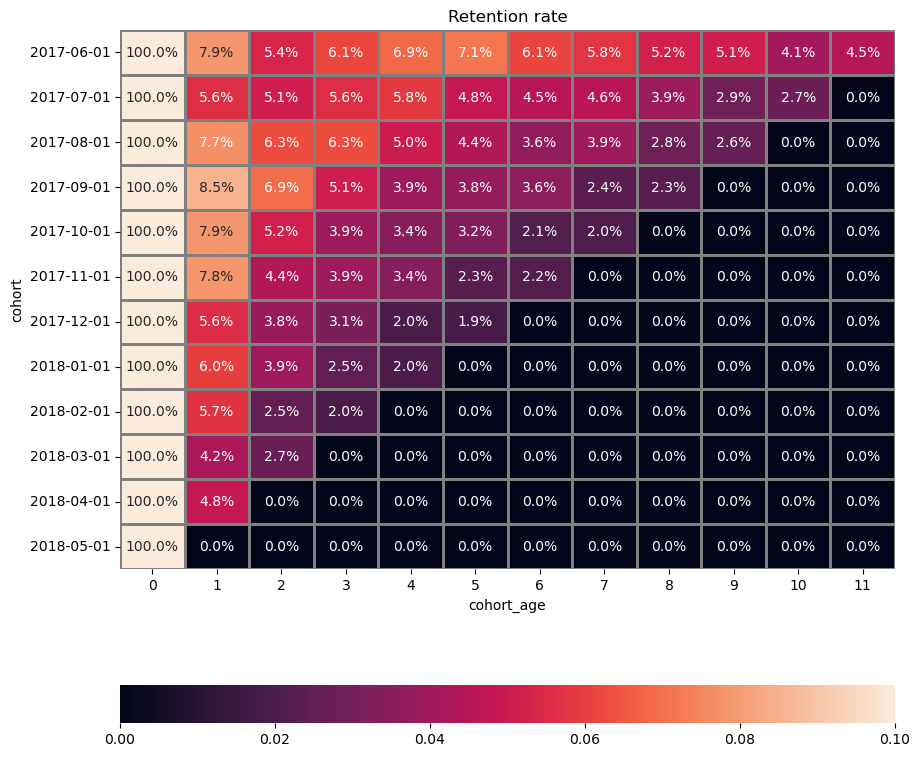

In [327]:
# visualizing retention

retention.index=retention.index.astype(str)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(retention, annot=True, fmt='.1%', linewidth=1, linecolor='grey',\
            ax=ax, vmax=0.1, cbar_kws={'orientation': 'horizontal'}).set(title='Retention rate')
plt.show()

In [328]:
# Finding the number of users on 0 month

initial_users_count=visits[visits['cohort_age']==0][['first_session','uid']]

initial_users_count

,first_session,uid
0,2017-12-20 17:20:00,16879256277535980062
1,2018-02-19 16:53:00,104060357244891740
2,2017-07-01 01:54:00,7459035603376831527
4,2018-03-09 20:05:00,16174680259334210214
5,2017-12-27 14:06:00,9969694820036681168
...,...,...
359395,2018-04-23 21:11:00,12734910664455613822
359396,2017-11-08 13:39:00,6761309174945977743
359397,2017-07-31 12:13:00,11102751930812818282
359398,2018-03-20 15:11:00,272012551460639309


#### Overall Reatention Rate

<a id="18"></a>

In [329]:
initial_users_count=initial_users_count.rename(columns={'uid': 'cohort_users'})

In [330]:
visits_re=visits.merge(initial_users_count, on='first_session')

visits_re['retention']=visits_re['uid']/visits_re['cohort_users']

In [331]:
# Calculating the overall retention rate

visits_re.retention.mean()

2.218558051117237

<div class="alert alert-info"> 
<b>Insights</b> 

The Overall retention rate is: 2.21

The September cohort demonstrates the highest retention rate in the first month of life, with 8.5%.
1428 of users who used Yandex.Afisha in September continued to use it the following month as well.

The September cohort exhibits the highest retention rate with 6.9% even in the second month of life.

On the contrary, the June cohort has the highest retention rate from the fourth month onwards (6.9).
The June cohort consistently has the highest retention rate from the fourth month of life to the end of the first year of life.
The June cohort has the greatest retention rate of 4.5% at the end of the calculation year, which started in June 2017.
</div>

In [332]:
# finding each user first time of order

min_orders=orders.groupby(['uid'])['buy_ts'].min().reset_index()

min_orders.columns=['uid', 'first_order']

In [333]:
# merging 'min_order' to 'first_session'

per_user=first_session.merge(min_orders, how='outer', on=['uid'])

per_user

,uid,first_session,first_order
0,11863502262781,2018-03-01 17:27:00,NaT
1,49537067089222,2018-02-06 15:55:00,NaT
2,297729379853735,2017-06-07 18:47:00,NaT
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
4,325320750514679,2017-09-30 14:29:00,NaT
...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,NaT
228165,18446424184725333426,2017-12-06 20:32:00,NaT
228166,18446556406699109058,2018-01-01 16:29:00,NaT
228167,18446621818809592527,2017-12-27 13:27:00,NaT


In [334]:
# slicing the data

per_user=per_user[per_user['first_order']>per_user['first_session']]

per_user.shape

(34068, 3)

#### Conversion Rate

<a id="19"><a/>

In [335]:
pd.options.mode.chained_assignment = None

per_user['conversion']=((pd.to_datetime(per_user['first_order'])\
                         -pd.to_datetime(per_user['first_session']))/np.timedelta64(1, 'D')).astype('int')

In [336]:
fig=px.histogram(per_user, x='conversion', nbins=30, title="Mean Conversion Time")
fig.show()

In [337]:
per_user['conversion'].median()

0.0

In [338]:
display('the overall conversion rate is {:.1%}'.format(min_orders['uid'].\
                                                       nunique()/first_session['uid'].nunique()))

'the overall conversion rate is 16.0%'

<div class="alert alert-info"> 
<b>Insights</b> 

One day is the typical amount of time needed to turn a user into a customer. 
    
The majority of clients placed an order the same day as their initial session.
    
The median index was utilized since the distribution of the conversion time isn't normal. 
    
The median conversion time is zero.

The overall conversion rate was calculated by dividing the number of unique users who made the initial order by the
    
number of unique users who made the first session.
    
The overall conversion rate is: 16%.
</div>

In [339]:
# defining the first order

first_order=orders.groupby(['uid'])['buy_ts'].min().reset_index()

first_order.columns=['uid', 'first_order']

first_order.head(10)

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
5,3077748354309989,2018-03-03 12:33:00
6,3605148382144603,2017-09-21 20:56:00
7,3753586865891862,2018-03-03 13:50:00
8,4808417689019433,2018-01-09 23:32:00
9,4992223027560440,2018-04-04 13:54:00


In [340]:
# merging 'first_order' into 'orders'

orders=orders.merge(first_order, how='inner', on=['uid'])

orders.head(10)

,buy_ts,revenue,uid,date,week,month,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01 07:58:00
5,2017-06-01 08:43:00,0.18,10402394430196413321,2017-06-01,2017-06-01,2017-06-01,2017-06-01 08:43:00
6,2017-06-01 08:54:00,1.83,12464626743129688638,2017-06-01,2017-06-01,2017-06-01,2017-06-01 08:54:00
7,2017-06-05 14:30:00,7.33,12464626743129688638,2017-06-05,2017-06-01,2017-06-01,2017-06-01 08:54:00
8,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,2017-06-01,2017-06-01 09:22:00
9,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,2017-06-01,2017-06-01,2017-06-01 09:22:00


In [341]:
# creating 'first_order_month' column, casting it as datetime64[M] object

orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')

In [342]:
# grouping by 'first_order_month', counting unique id's & reseting index
## changing columns names for further merging

cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

cohort_sizes.columns=['first_order_month','cohort_size']

cohort_sizes.head(13).sort_values(by='cohort_size', ascending=False)

,first_order_month,cohort_size
6,2017-12-01,4383
4,2017-10-01,4340
5,2017-11-01,4081
8,2018-02-01,3651
9,2018-03-01,3533
7,2018-01-01,3373
11,2018-05-01,2988
3,2017-09-01,2581
10,2018-04-01,2276
0,2017-06-01,2023


In [343]:
# calculating number of purchases for cohort and month:

cohort=orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns=['first_order_month','month','orders']

# merging cohort with cohort sizes

cohort=cohort.merge(cohort_sizes,on=['first_order_month'])

# adding 'age_month' column:

cohort['age_month']=((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1, 'M')).round()

# adding orderd_per_buyers:

cohort['orders_per_buyers']=cohort['orders']/cohort['cohort_size']
cohort.head()

,first_order_month,month,orders,cohort_size,age_month,orders_per_buyers
0,2017-06-01,2017-06-01,2354,2023,0.0,1.163618
1,2017-06-01,2017-07-01,177,2023,1.0,0.087494
2,2017-06-01,2017-08-01,174,2023,2.0,0.086011
3,2017-06-01,2017-09-01,226,2023,3.0,0.111715
4,2017-06-01,2017-10-01,292,2023,4.0,0.144340


In [344]:
# pivot table wich sums 'ordrs_per_buyers' by rows of cohorts & columns of lifetime's

cohort_piv=cohort.pivot_table(index='first_order_month', columns='age_month',\
                              values='orders_per_buyers', aggfunc='sum')

cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,0.09,0.09,0.11,0.14,0.11,0.14,0.09,0.1,0.08,0.05,0.04
2017-07-01,1.14,0.05,0.06,0.05,0.04,0.04,0.03,0.03,0.03,0.01,0.03,
2017-08-01,1.12,0.08,0.07,0.06,0.06,0.05,0.04,0.06,0.03,0.03,,
2017-09-01,1.14,0.08,0.06,0.06,0.03,0.04,0.04,0.02,0.02,,,
2017-10-01,1.14,0.07,0.04,0.03,0.03,0.02,0.02,0.03,,,,
2017-11-01,1.18,0.1,0.04,0.05,0.03,0.01,0.02,,,,,
2017-12-01,1.15,0.06,0.05,0.04,0.02,0.02,,,,,,
2018-01-01,1.12,0.07,0.05,0.02,0.02,,,,,,,
2018-02-01,1.12,0.06,0.02,0.02,,,,,,,,


In [345]:
# changing cohort_piv in order to show cumulative values, rounding, filling missing cells with ''

cohort_piv=cohort.pivot_table(index='first_order_month', columns='age_month',\
                              values='orders_per_buyers', aggfunc='sum').cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


<div class="alert alert-info"> 
<b>Insights</b> 

Here we see the cohorts according to the order amount per user throughout the months.
We look at the user's performance in the cohort according to a timeline of the cohort's life.

June cohort, the first cohort demonstrates higher financial returns than the other cohorts over time.
In the first two months, the June cohort is not in the first place in the yield from a client. But from the third month onwards, the June cohort leads in the amount of orders per customer compared to the other cohorts.
</div>

#### Average Purchase Size

<a id="20"></a>

In [346]:
avg_pur=orders.groupby(['uid'])['revenue'].sum().reset_index()

fig=px.histogram(avg_pur, x='revenue', nbins=35)

fig.show()

In [347]:
# Average user check

round(avg_pur.revenue.mean(), 2)

6.9

In [348]:
# The average purchase size
round(orders.revenue.mean(), 2)

5.0

<div class="alert alert-info"> 
<b>Insights</b>
    
Ther average_user_check: 7 (rounded)
    
The average purchase size is: 5 (rounded)

</div>

In [349]:
# average purchase size in cohorts

avg_cohort=orders.groupby(['first_order_month','month'])['revenue'].mean().reset_index()
avg_cohort['age_month']=((avg_cohort['month'] - avg_cohort['first_order_month']) / np.timedelta64(1, 'M')).round()
avg_cohort.head()

,first_order_month,month,revenue,age_month
0,2017-06-01,2017-06-01,4.060106,0.0
1,2017-06-01,2017-07-01,5.547006,1.0
2,2017-06-01,2017-08-01,5.088161,2.0
3,2017-06-01,2017-09-01,8.545575,3.0
4,2017-06-01,2017-10-01,7.084178,4.0


In [350]:
avg_cohort_piv=avg_cohort.pivot_table(index='first_order_month',\
                                      columns='age_month', values='revenue', aggfunc='mean')
avg_cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,5.55,5.09,8.55,7.08,6.83,6.97,6.76,5.28,8.01,12.04,6.04
2017-07-01,5.29,6.45,9.99,6.64,4.72,3.66,3.79,5.45,5.35,11.79,5.65,
2017-08-01,4.72,5.99,6.28,6.62,7.96,6.27,5.89,7.11,8.7,5.6,,
2017-09-01,4.97,13.17,8.35,62.57,15.43,15.32,16.77,11.21,7.79,,,
2017-10-01,4.37,7.41,5.13,5.59,5.1,5.07,4.28,4.01,,,,
2017-11-01,4.37,4.1,4.47,6.28,4.44,3.73,4.6,,,,,
2017-12-01,4.11,4.23,20.07,26.08,15.95,14.11,,,,,,
2018-01-01,3.69,4.44,6.45,7.52,2.71,,,,,,,
2018-02-01,3.71,4.58,3.45,3.87,,,,,,,,


In [351]:
avg_cohort_piv=avg_cohort.pivot_table(index='first_order_month', columns='age_month',\
                                      values='revenue', aggfunc='mean').cumsum(axis=1)
avg_cohort_piv.round(2).fillna('')

age_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
first_order_month,,,,,,,,,,,,
2017-06-01,4.06,9.61,14.7,23.24,30.33,37.15,44.12,50.88,56.16,64.17,76.21,82.25
2017-07-01,5.29,11.73,21.73,28.36,33.08,36.74,40.53,45.99,51.33,63.12,68.77,
2017-08-01,4.72,10.7,16.98,23.6,31.56,37.83,43.72,50.83,59.54,65.14,,
2017-09-01,4.97,18.14,26.49,89.06,104.49,119.81,136.58,147.79,155.57,,,
2017-10-01,4.37,11.78,16.91,22.5,27.6,32.67,36.95,40.96,,,,
2017-11-01,4.37,8.47,12.95,19.23,23.68,27.4,32.0,,,,,
2017-12-01,4.11,8.34,28.41,54.49,70.44,84.55,,,,,,
2018-01-01,3.69,8.13,14.58,22.11,24.82,,,,,,,
2018-02-01,3.71,8.28,11.74,15.6,,,,,,,,


#### Life Time Value : LTV

<a id="21"></a>

In [352]:
# getting the revenue per cohort in each month

ltv_cohort=orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()

ltv_cohort.columns=['first_order_month','month','revenue']

# merging with the cohort size

ltv_cohort=ltv_cohort.merge(cohort_sizes, on=['first_order_month'])

ltv_cohort['age']=((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1, 'M')).round()

ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['cohort_size']

ltv_cohort

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4.0,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2.0,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0.0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1.0,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0.0,4.660562


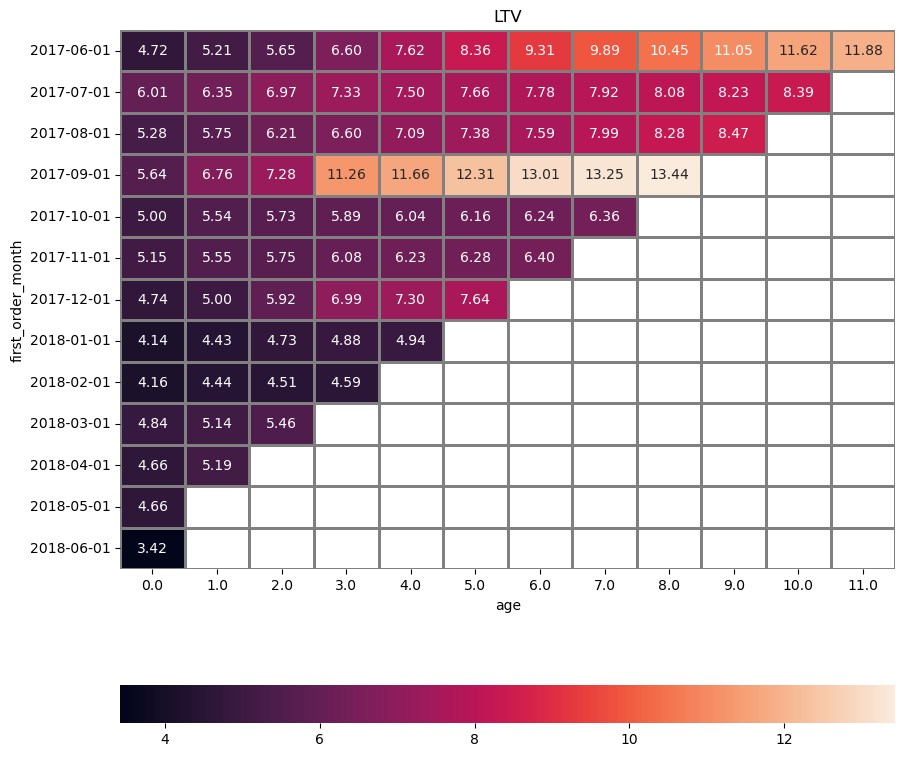

In [353]:
ltv_cohort_piv=ltv_cohort.pivot_table(index='first_order_month', columns='age',\
                                      values='ltv', aggfunc='sum').cumsum(axis=1)

ltv_cohort_piv.index=ltv_cohort_piv.index.astype(str)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', ax=ax,\
            cbar_kws={'orientation':'horizontal'}).set(title='LTV')
plt.show()

<div class="alert alert-info"> 
<b>Insights</b>
    
In terms of LTV, the September cohort is one of the best.
starting in the fourth month of life, The September cohort produced the most dramatic & fastest gains.

At the same time, while the September cohort stops its income in the 9th month of life, the summer cohorts generate consistent and stable profit increases that continue until the end of the first year of life.
    
Note that the good results in the September cohort are due to the anomaly high order size in the fourth month.

The fall cohorts yielded moderate gains, while the winter cohorts yielded the lowest gains. The seasons apparently play a significant role in the nature of the activities of users and how appropriate they are to spend money out of pocket.

</div>

#### Marketing Costs

<a id="22"></a>

In [354]:
# Calculationg overall costs

costs=costs.sort_values(by=['dt','source_id'])

costs.head()

,source_id,dt,costs,cost_month
0,1,2017-06-01,75.20,2017-06-01
363,2,2017-06-01,132.56,2017-06-01
726,3,2017-06-01,349.38,2017-06-01
1089,4,2017-06-01,76.74,2017-06-01
1452,5,2017-06-01,73.24,2017-06-01


In [355]:
display('The Total Marketing costs is {}$'.format(costs['costs'].sum()))

'The Total Marketing costs is 329131.62$'

#### Costs Per Source

<a id="23"></a>

In [356]:
# Calculation costs_per_source

costs_per_source=costs.groupby(['source_id'])['costs'].sum().reset_index()

costs_per_source.head(5).sort_values(by='costs', ascending=False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27


#### Costs Over Time By Source

<a id="24"></a>

In [357]:
fig=px.line(costs, x='dt', y='costs', color='source_id', render_mode="SVG")

fig.show()

<div class="alert alert-info"> 
<b>Insights</b>
    
A significant portion of the marketing budget was allocated to advertising source 3. It can be seen that throughout the year, advertising source 3 receives most of the funds.
On November 24, Advertising Source 3 reaches a budget peak.

Over time, sources 3, 5 and 4 receive the highest marketing resources.

Conversely, advertising sources 9 and 10 receive the lowest budget from the marketing budget pie.

</div>

#### Costs By Months

<a id="25"></a>

In [358]:
# calculating costs by months

costs_by_month=costs.groupby(['cost_month'])['costs'].sum().reset_index()

costs_by_month.head(5)

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [359]:
# calculating buyers in cost month

buyers_per_month=orders.groupby(['first_order_month'])['uid'].nunique().reset_index()

buyers_per_month.columns=['cost_month','buyers']

buyers_per_month.head()

,cost_month,buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


#### Customer Acquisition Cost: CAC

<a id="26"></a>

In [360]:
# merging buyers_per _month with costs_by_month

cac_per_month=costs_by_month.merge(buyers_per_month, how='left', on=['cost_month'])

cac_per_month['CAC']=cac_per_month['costs']/cac_per_month['buyers']

cac_per_month.head(10)

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


In [361]:
# top 5 cohorts by costs

cac_per_month.head(5).sort_values(by='costs', ascending=False)

,cost_month,costs,buyers,CAC
4,2017-10-01,36322.88,4340,8.369327
3,2017-09-01,24368.91,2581,9.441654
1,2017-07-01,18240.59,1923,9.485486
0,2017-06-01,18015.00,2023,8.905091
2,2017-08-01,14790.54,1370,10.796015


In [362]:
# top 5 cohorts by CAC

cac_per_month.head(5).sort_values(by='CAC', ascending=False)

,cost_month,costs,buyers,CAC
2,2017-08-01,14790.54,1370,10.796015
1,2017-07-01,18240.59,1923,9.485486
3,2017-09-01,24368.91,2581,9.441654
0,2017-06-01,18015.00,2023,8.905091
4,2017-10-01,36322.88,4340,8.369327


In [363]:
# top 5 cohorts by buyers

cac_per_month.head(5).sort_values(by='buyers', ascending=False)

,cost_month,costs,buyers,CAC
4,2017-10-01,36322.88,4340,8.369327
3,2017-09-01,24368.91,2581,9.441654
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015


In [364]:
# visualizing CAC

fig=px.line(cac_per_month, x='cost_month', y='CAC', title='CAC')
fig.show()

<div class="alert alert-info"> 
<b>Insights</b>
    
__I'll divide the various cohorts into seasonal quarters since seasonality may influence potential buyers:__
    

__Summer:__

_June-August months cohorts_

__51,046.13\$__ of the marketing budget, or __15.5\%__, spent on acquiring clients from these cohorts.

_At the same time, we had only been able to bring on __5,316__ new clients throughout the quarter. This quarter's client recruitment rate is the lowest of the entire year._

_The customer acquisition cost index hit an annual high of __10.79\$__ per customer in the cohort that ended in August, which stands out negatively._
_This month, out of all the months, the least amount of money __(14,790.54\$)__ was set aside for marketing._

The total initial size of the summer cohorts is __36,580 users__.
Of these, __5316__ users became customers.
The quarterly conversion rate for the customer is thus: 14%.




__Spring:__

_March-May months cohorts_

The annual marketing budget of __74,928.92\$__ or __22.76%__ was assigned for acquiring clients.

We were successful in luring __8797__ paying consumers during this quarter.
Customer acquisition costs have varied noticeably this quarter; from __8.6 in March to 9.79 in April to 7.43 in May.__

The May cohort is unique in that we were able to bring on __2,988__ new customers in only one month while at the same time the customer acquisition cost dropped to an annual low of __7.43.__

In contrast, the cost of acquiring customers in the month of August was higher __(10.79)__, but the hiring success rate was lower (less 1618 people).

The total initial size of the spring cohorts is __51,571 users__.
Of these, __8797__ users became customers.
The quarterly conversion rate for the customer is thus: 17%.
    
    

__Winter:__

_December-Febuary months cohorts_

In the winter quarter we managed to recruit the most paying customers of the entire year __(11,407)__.

This is not surprising, considering the fact that more than __31%__ of the marketing budget was allocated to recruiting customers in the winter months.

Customer acquisition costs have varied noticeably this quarter; from __8.74 in December to 9.93 in January to 8.96 in Febuary.__

In terms of client acquisition expenditures, the January cohort is exceptional: __\$9.93__ was spent on average for each new customer.

Large marketing budgets per customer were allocated to the January cohort, which came in second to the August cohort.

When compared to the investment rate in January, the August cohort seemed to have struggled with budgeting and recruiting since it had the highest investment rate per customer (10.79) and only managed to sign up __1370__ clients.

The total initial size of the winter cohorts is __70,089 users__.
Of these, __11,407__ users became customers.
The quarterly conversion rate for the customer is thus: 16%.



__Fall:__

_September-November months cohorts_

__11,002__ users engaged in becoming clients in the fall quarter.

Customer acquisition accounted for about __30%__ of the marketing spend this year.

Customer acquisition costs have varied noticeably this quarter; from __9.44 in September to 8.36 in October to 9.28 in November.__

The fall cohorts have __69,929__ users as at the initial stage.
__11,002__ of them, as was already said, ended up as clients.
Therefore, __15%__ of conversions are made.

</div>

#### User's First Source

<a id="27"></a>

In [365]:
first_source=visits.sort_values('date').groupby('uid').first()['source_id'].reset_index()

first_source.columns=['uid','first_source']

first_source.head(13)

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
5,397399764396656,4
6,407573351275847,2
7,498809019029702,4
8,526778907996220,2
9,577434573913691,9


In [366]:
orders = orders.merge(first_source, on=['uid'], how='left')

orders.head(2)

,buy_ts,revenue,uid,date,week,month,first_order,first_order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:10:00,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01 00:25:00,2017-06-01,2


#### Costs By Months & Source

<a id="28"></a>

In [367]:
costs_by_month_source=costs.groupby(['cost_month','source_id'])['costs'].sum().reset_index()

costs_by_month_source.columns=['cost_month','source','costs']

costs_by_month_source.head(2)

,cost_month,source,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38


#### Buyers Per Months & Sources

<a id="29"></a>

In [368]:
buyers_per_month_source=orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_month_source.columns=['cost_month','source','buyers']
buyers_per_month_source.head(2)

,cost_month,source,buyers
0,2017-06-01,1,218
1,2017-06-01,2,236


In [369]:
cac_per_month_source=costs_by_month_source.merge(buyers_per_month_source, how='left', on=['cost_month','source'])

cac_per_month_source['CAC']=cac_per_month_source['costs']/cac_per_month_source['buyers']

cac_per_month_source.head(10)

,cost_month,source,costs,buyers,CAC
0,2017-06-01,1,1125.61,218,5.163349
1,2017-06-01,2,2427.38,236,10.285508
2,2017-06-01,3,7731.65,618,12.510761
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,390,6.708000
5,2017-06-01,9,285.22,66,4.321515
6,2017-06-01,10,314.22,94,3.342766
7,2017-07-01,1,1072.88,192,5.587917
8,2017-07-01,2,2333.11,207,11.271063
9,2017-07-01,3,7674.37,498,15.410382


#### Overall CAC Per Source & Months

<a id="30"></a>

In [370]:
# calculating the overall cac per source month

cac_per_month['CAC'].mean()

9.147357292482544

In [371]:
fig = px.line(cac_per_month_source, x='cost_month', y='CAC', color='source', title='CAC')

fig.add_hline(y=cac_per_month['CAC'].mean(), line_dash='dash', line_color='purple',\
              annotation_text='average CAC', annotation_position='top left')
fig.show()

<div class="alert alert-info"> 
<b>Insights</b>
    
__The overall CAC is: 9.14__

__Source 3__ is the advertising source on which we spent the most money per client, within the exception of February.
Cac per source month peaked in August at 18.9.

__Source 2__ is ranked second in terms of the cost of an advertising source.
The CAC for this source reached a record high of 15.06 at the conclusion of the February cohort.
Sources 2 and 3 are notable for their distinctions from the other advertising sources and have much higher CAC indices.

Alternating patterns are expressed by advertising __sources 4 and 5__:
While spending on Source 4 is higher than that on Source 5 from June to October, the situation changes after that month, with more and more customers coming from Source 4.

The source for which we spent the least per customer was __Source 10__.

When cac was tripled for clients from this source in April, __Source 9__ expressed the most dramatic shift among all sources.

__Source 1__: a cac low of 5.16 and a cac high of 7.6.

It is clear that while the other advertising sources do not exceed the average, __sources 2 and 3 cost us more than the overall cac average.__

</div>

In [372]:
cac_per_month_roi=cac_per_month[['cost_month','CAC']]

cac_per_month_roi.columns=['first_order_month','CAC']

roi = ltv_cohort.merge(cac_per_month_roi, on=['first_order_month'], how='left')
roi.head(4)

,first_order_month,month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0.0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1.0,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2.0,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3.0,0.954671,8.905091


#### Return Of invesstment: ROI

<a id="31"></a>

In [373]:
roi['ROI']=roi['ltv']/roi['CAC']

roi_piv = roi.pivot_table(index='first_order_month', columns='age', \
                          values='ROI', aggfunc='mean').cumsum(axis=1).round(2)

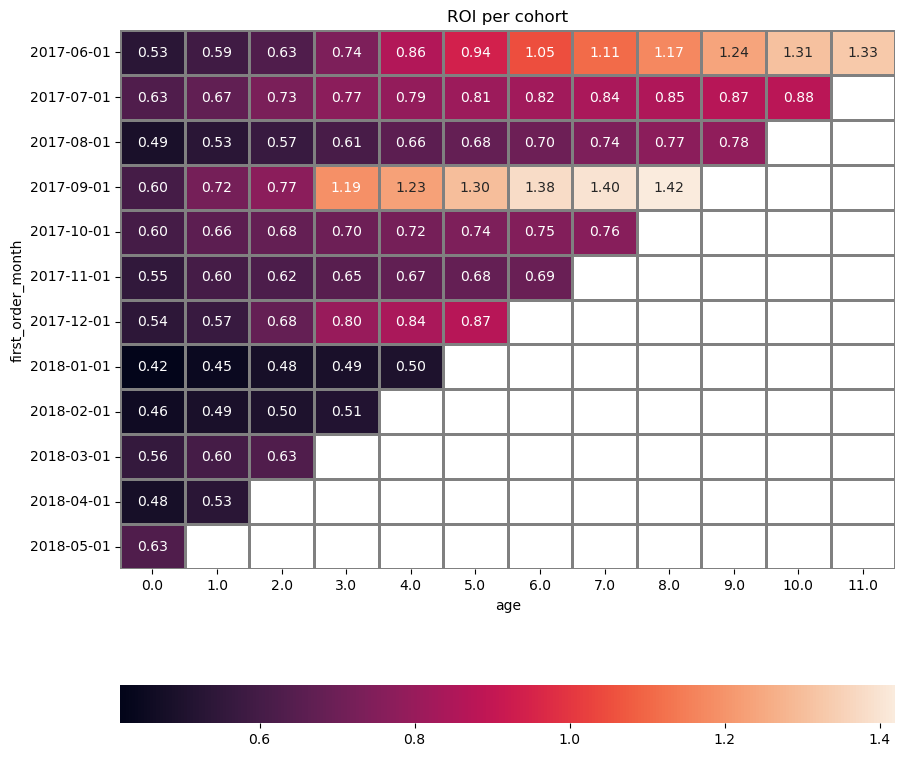

In [374]:
# visualizing ROI per cohort

roi_piv.index=roi_piv.index.astype(str)

fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey',\
            ax=ax, cbar_kws={'orientation':'horizontal'}).set(title='ROI per cohort')
plt.show()

<div class="alert alert-info"> 
<b>Insights</b>
    
When the ROI index shows a steady and significant increase throughout the year, the __June cohort is the second most successful.__

With a cumulative __ROI of 1.33%__, the June cohort completes its first year of life.

On the other hand, the __September cohort__ adds up 9 months of life with a __greater cumulative roi__, making it the cohort with the highest roi in the shortest life duration in terms of ROI.

Furthermore, compared to the June cohort, the September cohort achieves higher roi indices.

The other cohorts achieve moderate roi results.

Among the __less successful cohorts - January and February__ cohorts.

</div>

#### LTV Per Source

<a id="32"></a>

In [375]:
# Calculating LTV per source, grouping by 'first_source', counting unique users id's and summing the revenue

ltv_per_source=orders.groupby(['first_source'])['uid','revenue'].\
agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()

ltv_per_source.columns=['source_id','buyers','revenue']

ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

,source_id,buyers,revenue,ltv
0,1,3383,35529.84,10.502465
1,2,3557,45721.66,12.853995
2,3,10121,51183.42,5.057150
3,4,9996,55009.80,5.503181
4,5,7104,54478.15,7.668659
5,7,1,1.22,1.220000
6,9,1060,5536.96,5.223547
7,10,1301,4596.15,3.532782


#### ROMI Per Source

<a id="33"></a>

In [376]:
romi_per_source=costs_per_source.merge(ltv_per_source, on=['source_id'])

romi_per_source['cac']=romi_per_source['costs']/romi_per_source['buyers']

romi_per_source['romi']=romi_per_source['ltv']/romi_per_source['cac']
romi_per_source

,source_id,costs,buyers,revenue,ltv,cac,romi
0,1,20833.27,3383,35529.84,10.502465,6.158223,1.705438
1,2,42806.04,3557,45721.66,12.853995,12.034310,1.068112
2,3,141321.63,10121,51183.42,5.057150,13.963208,0.362177
3,4,61073.60,9996,55009.80,5.503181,6.109804,0.900713
4,5,51757.10,7104,54478.15,7.668659,7.285628,1.052573
5,9,5517.49,1060,5536.96,5.223547,5.205179,1.003529
6,10,5822.49,1301,4596.15,3.532782,4.475396,0.789379


In [377]:
fig = px.bar(romi_per_source, x='source_id', y='romi')
fig.update_xaxes(type='category')
fig.show()

<div class="alert alert-info"> 
<b>Insights</b>
    
It turns out that the return on investment test does not favor Advertising Source 3.
Source 3 had the lowest roi (0.36) of the sources.

Source 10, on which, as I recall, we spent the least amount of money, gave us a double return on our investment over Source 3.

A romi of 0.90 was attained by a 4th source.

A romi of 1 was attained by a 9th source.

Advertising sources 5 and 2 produced romi indices that were nearly identical (1.05, 1.06 respectively).

With a 1.70 romi index score, advertising source 1 is the dominant advertising source.
</div>

<a id="34"></a>

# Overall Conclusions

The average number of active users per day __(DAU)__ is __908 users.__

The average number of active users per week __(WAU)__ is __5724.41.__

The average number of active users per month __(MAU)__ is __23228.41.__

__Average sessions per day is 907.99.__

A _user_ makes an average of __1__ sessions per day.__

The median session time is __5 minutes (or 300 seconds).__

The overall __retention rate__ is __2.27.__

The overall conversion rate is __16%.__

The __median conversion time__ from a user to a paying customer is __zero days__. Most customers converted on the day they signed up.

The average __purchase size is: 6.90\$__

In terms of __LTV__, __September cohort is the best.__
The summer cohorts are also successful, among which the June cohort stands out.

The total __Marketing costs is 329131.62__.

The bulk of the marketing budget was allocated to __advertising source 3__: __141321.63\$__

The overall cac per source month 9.14

Advertising _source 1_ has proven to be the most profitable advertising source in terms of return on investment (romi).

That's why I recommend cutting down on advertising source 3, and on the other hand, increasing the investment in advertising source 1.